344.40175711148345


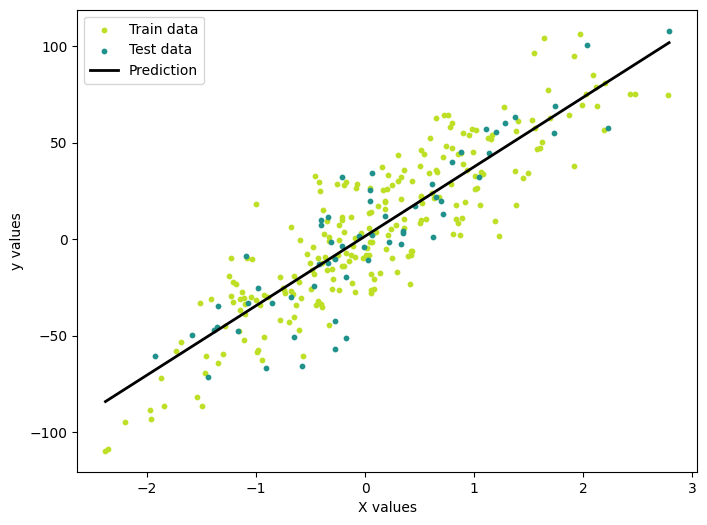

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets


class LinearRegression:
    """

    """

    def __init__(self, lr: float = 0.001, num_iters: int = 400):
        """ 
        
        """
        self.lr: float = lr
        self.num_iters: int = num_iters
        self.weights: np.array = None
        self.bias: float = None

    def fit(self, X, y):
        """
        
        """
        # Initialize weights and bias to zero
        num_samples, num_features = X.shape # Get the number of samples(rows) and features (columns) from X
        self.weights = np.zeros(num_features) 
        self.bias = 0 

        for _ in range(self.num_iters):
            # Get Pediction
            y_pred = np.dot(X, self.weights) + self.bias # y^ = wX + b

            # Gradients
            weights_derivation: np.zeros = (1 / num_samples) * np.dot(X.T, (y_pred - y)) # Get the derivations of weights 
            bias_derivation: float = (1 / num_samples) * np.sum(y_pred - y)  # Get the derivations of bias

            # Update weights and bias
            self.weights -= self.lr * weights_derivation
            self.bias -= self.lr * bias_derivation

    def predict(self, X)-> float:
        """
        
        """
        return np.dot(X, self.weights) + self.bias

def mse(y_test, predictions):
    return np.mean((y_test - predictions) **2)



X, y = datasets.make_regression(n_samples=300, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

reg = LinearRegression(lr=0.01)
reg.fit(X, y)
predictions = reg.predict(X_test)
mse = mse(y_test, predictions)

print(mse)



y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))

m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label='Train data')
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10, label='Test data')

X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # Create a smooth X-axis range
y_pred_line = reg.predict(X_range)  # 


plt.plot(X_range, y_pred_line, color='black', linewidth=2, label='Prediction')

# Add labels and a legend
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()

# Show plot
plt.show()